In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import os
import math
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from keras.utils import load_img
from keras.utils import img_to_array
from keras.models import load_model
from keras.callbacks import EarlyStopping
from keras.callbacks import LearningRateScheduler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
base_path = '/kaggle/input/fast-food-classification-dataset/Fast Food Classification V2'

In [3]:
os.listdir(base_path)

['TFRecords', 'Valid', 'Test', 'Train']

In [4]:
train_path = os.path.join(base_path, 'Train')
val_path = os.path.join(base_path, 'Valid')
test_path = os.path.join(base_path, 'Test')

In [ ]:
labels = os.listdir(train_path)

In [ ]:
labels

In [ ]:
def get_images_for_KNN(base_path, categories, n_sample):
    images = []
    labels = []
    
    for category in categories:
        path = os.path.join(base_path, category)
        files = os.listdir(path)
        
        for i in range(n_sample):
            img = os.path.join(path, files[i])
            if img[-4:] == 'jpeg':
                img = load_img(img, target_size = (256, 256))
                img = img_to_array(img)
                images.append(img.flatten())
                labels.append(category)
    
    images = np.vstack(images)
    
    return (np.array(images), np.array(labels))

In [ ]:
X_train, Y_train = get_images_for_KNN(train_path, labels, 500)

In [ ]:
X_train.shape

In [ ]:
X_test, Y_test = get_images_for_KNN(test_path, labels, 100)

In [ ]:
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(Y_train)

In [ ]:
Y_test = label_encoder.transform(Y_test)

In [ ]:
KNN = KNeighborsClassifier(n_neighbors = 5)

In [ ]:
KNN.fit(X_train, labels)

In [ ]:
preds = KNN.predict(X_test)

In [ ]:
print(classification_report(Y_test, preds, target_names = label_encoder.classes_))

In [ ]:
accuracy_score(Y_test, preds)

In [ ]:
KNN10 = KNeighborsClassifier(n_neighbors = 10)

In [ ]:
KNN10.fit(X_train, labels)

In [ ]:
preds = KNN10.predict(X_test)

In [ ]:
print(classification_report(Y_test, preds, target_names = label_encoder.classes_))

In [ ]:
accuracy_score(Y_test, preds)

In [ ]:
KNN20 = KNeighborsClassifier(n_neighbors = 20)

In [ ]:
KNN20.fit(X_train, labels)

In [ ]:
preds = KNN20.predict(X_test)

In [ ]:
print(classification_report(Y_test, preds, target_names = label_encoder.classes_))

In [ ]:
accuracy_score(Y_test, preds)

In [ ]:
KNN30 = KNeighborsClassifier(n_neighbors = 30)

In [ ]:
KNN30.fit(X_train, labels)

In [ ]:
preds = KNN30.predict(X_test)

In [ ]:
print(classification_report(Y_test, preds, target_names = label_encoder.classes_))

In [ ]:
accuracy_score(Y_test, preds)

In [ ]:
def get_images_for_ANN(base_path, categories, n_sample):
    images = []
    labels = []
    
    for category in categories:
        path = os.path.join(base_path, category)
        files = os.listdir(path)
        
        for i in range(n_sample):
            img = os.path.join(path, files[i])
            if img[-4:] == 'jpeg':
                img = load_img(img, target_size = (64, 64))
                img = img_to_array(img)
                images.append(img.flatten())
                labels.append(category)
    
    return (np.array(images), np.array(labels))

In [ ]:
categories = os.listdir(train_path)

In [ ]:
X_train, Y_train = get_images_for_ANN(train_path, categories, 500)

In [ ]:
X_train.shape

In [ ]:
label_encoder = LabelEncoder()
Y_train = label_encoder.fit_transform(Y_train)

In [ ]:
Y_train

In [ ]:
X_val, Y_val = get_images_for_ANN(val_path, categories, 200)

In [ ]:
Y_val = label_encoder.transform(Y_val)

In [ ]:
X_test, Y_test = get_images_for_ANN(test_path, categories, 100)

In [ ]:
Y_test = label_encoder.transform(Y_test)

In [ ]:
Y_test

In [ ]:
ANN = tf.keras.models.Sequential([
    tf.keras.layers.Dense(12288, input_shape = (12288,)),
    
    tf.keras.layers.Dense(8192, activation = 'relu'),
    #tf.keras.layers.Dense(8192, activation = 'relu'),
    
    tf.keras.layers.Dense(4096, activation = 'relu'),
    #tf.keras.layers.Dense(4096, activation = 'relu'),
    
    tf.keras.layers.Dense(2056, activation = 'relu'),
    tf.keras.layers.Dense(1024, activation = 'relu'),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

In [ ]:
ANN.summary()

In [ ]:
ANN.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(), optimizer = tf.keras.optimizers.Adam(), metrics = 'accuracy')

In [ ]:
ANN.fit(X_train, Y_train, batch_size = 5, epochs = 30)

In [ ]:
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 5)

In [ ]:
ANN_v2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(12288, input_shape = (12288,)),
    
    tf.keras.layers.Dense(8192, activation = 'relu'),
    
    tf.keras.layers.Dense(4096, activation = 'relu'),
    tf.keras.layers.Dense(4096, activation = 'relu'),
    
    tf.keras.layers.Dense(2056, activation = 'relu'),
    tf.keras.layers.Dense(2056, activation = 'relu'),
    
    tf.keras.layers.Dense(1024, activation = 'relu'),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

In [ ]:
ANN_v2.summary()

In [ ]:
ANN_v2.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(), optimizer = tf.keras.optimizers.Adam(), metrics = 'accuracy')

In [ ]:
history = ANN_v2.fit(X_train, Y_train, batch_size = 5, validation_data = (X_val, Y_val), epochs = 30, callbacks = [es])

In [ ]:
ANN_v3 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(12288, input_shape = (12288,)),
    
    tf.keras.layers.Dense(8192, activation = 'tanh'),
    
    tf.keras.layers.Dense(4096, activation = 'tanh'),
    tf.keras.layers.Dense(4096, activation = 'tanh'),
    
    tf.keras.layers.Dense(2056, activation = 'tanh'),
    tf.keras.layers.Dense(2056, activation = 'tanh'),
    
    tf.keras.layers.Dense(1024, activation = 'tanh'),
    tf.keras.layers.Dense(1024, activation = 'tanh'),
    
    tf.keras.layers.Dense(256, activation = 'tanh'),
    tf.keras.layers.Dense(64, activation = 'tanh'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

In [ ]:
ANN_v3.summary()

In [ ]:
ANN_v3.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(), optimizer = tf.keras.optimizers.Adam(), metrics = 'accuracy')

In [ ]:
history = ANN_v3.fit(X_train, Y_train, batch_size = 5, validation_data = (X_val, Y_val), epochs = 30, callbacks = [es])

In [ ]:
X_train_norm = X_train/255
X_val_norm = X_val/255

In [ ]:
ANN_NORM = tf.keras.models.Sequential([
    tf.keras.layers.Dense(12288, input_shape = (12288,)),
    
    tf.keras.layers.Dense(8192, activation = 'tanh'),
    
    tf.keras.layers.Dense(4096, activation = 'tanh'),
    tf.keras.layers.Dense(4096, activation = 'tanh'),
    
    tf.keras.layers.Dense(2056, activation = 'tanh'),
    tf.keras.layers.Dense(2056, activation = 'tanh'),
    
    tf.keras.layers.Dense(1024, activation = 'tanh'),
    tf.keras.layers.Dense(1024, activation = 'tanh'),
    
    tf.keras.layers.Dense(256, activation = 'tanh'),
    tf.keras.layers.Dense(64, activation = 'tanh'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

In [ ]:
ANN_NORM.summary()

In [ ]:
ANN_NORM.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(), optimizer = tf.keras.optimizers.Adam(), metrics = 'accuracy')

In [ ]:
history = ANN_NORM.fit(X_train_norm, Y_train, batch_size = 5, validation_data = (X_val_norm, Y_val), epochs = 30, callbacks = [es])

In [5]:
file_paths = []
labels = []

categories = os.listdir(train_path)

for category in categories:
    path = os.path.join(train_path, category)
    for file in os.listdir(path):
        if file[-4:] == 'jpeg': 
            file_paths.append(os.path.join(path, file))
            labels.append(category)
        
train_df = pd.DataFrame({'path' : file_paths, 'label' : labels})

In [6]:
train_df

,path,label
0,/kaggle/input/fast-food-classification-dataset...,Donut
1,/kaggle/input/fast-food-classification-dataset...,Donut
2,/kaggle/input/fast-food-classification-dataset...,Donut
3,/kaggle/input/fast-food-classification-dataset...,Donut
4,/kaggle/input/fast-food-classification-dataset...,Donut
...,...,...
14773,/kaggle/input/fast-food-classification-dataset...,Taquito
14774,/kaggle/input/fast-food-classification-dataset...,Taquito
14775,/kaggle/input/fast-food-classification-dataset...,Taquito
14776,/kaggle/input/fast-food-classification-dataset...,Taquito


In [7]:
file_paths = []
labels = []

categories = os.listdir(val_path)

for category in categories:
    path = os.path.join(val_path, category)
    for file in os.listdir(path):
        if file[-4:] == 'jpeg': 
            file_paths.append(os.path.join(path, file))
            labels.append(category)
        
val_df = pd.DataFrame({'path' : file_paths, 'label' : labels})

In [8]:
val_df

,path,label
0,/kaggle/input/fast-food-classification-dataset...,Donut
1,/kaggle/input/fast-food-classification-dataset...,Donut
2,/kaggle/input/fast-food-classification-dataset...,Donut
3,/kaggle/input/fast-food-classification-dataset...,Donut
4,/kaggle/input/fast-food-classification-dataset...,Donut
...,...,...
3495,/kaggle/input/fast-food-classification-dataset...,Taquito
3496,/kaggle/input/fast-food-classification-dataset...,Taquito
3497,/kaggle/input/fast-food-classification-dataset...,Taquito
3498,/kaggle/input/fast-food-classification-dataset...,Taquito


<AxesSubplot: ylabel='label'>

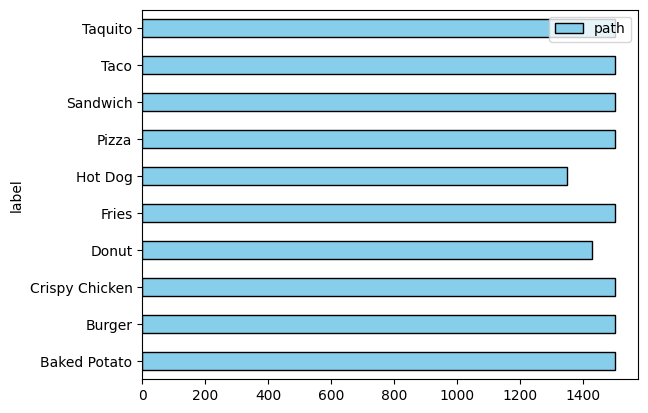

In [9]:
train_df.groupby(['label']).count().plot.barh(color = 'skyblue', edgecolor = 'black')

<AxesSubplot: ylabel='label'>

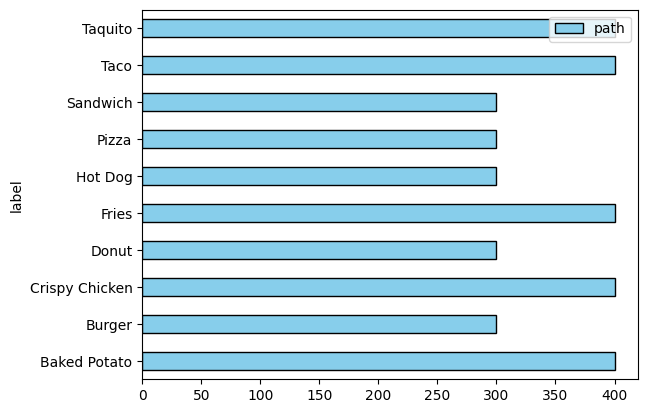

In [10]:
val_df.groupby(['label']).count().plot.barh(color = 'skyblue', edgecolor = 'black')

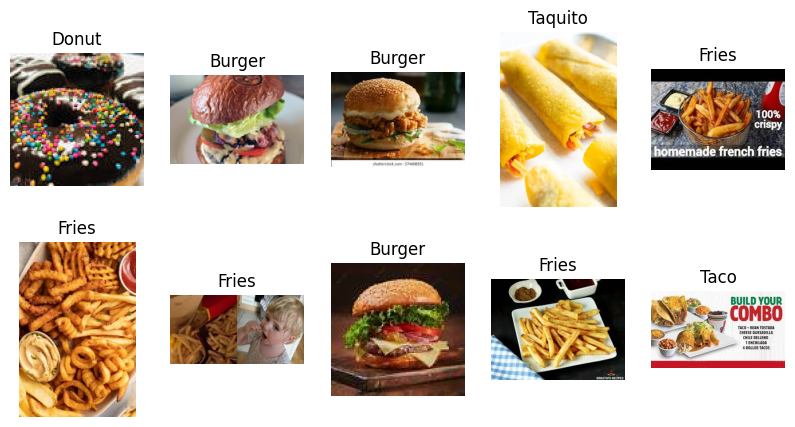

In [11]:
fig = plt.figure(figsize = (10,5))

for i in range(1, 11):    
    index = np.random.randint(len(train_df))
    
    image_path = train_df['path'][index]
    category = train_df['label'][index]
    
    image = np.asarray(Image.open(image_path))
    plt.subplot(2,5,i)
    plt.imshow(image)
    plt.axis('off')
    plt.title(category)
    
plt.show()

In [ ]:
train_generator = ImageDataGenerator().flow_from_dataframe(train_df, 
                                                    x_col = 'path',
                                                    y_col = 'label',
                                                    target_size=(256,256),
                                                    color_mode = 'rgb',
                                                    classes = categories,
                                                    batch_size = 32, 
                                                    class_mode='categorical')

In [9]:
validation_generator = ImageDataGenerator().flow_from_dataframe(val_df,
                                                        x_col = 'path',
                                                        y_col = 'label',
                                                        target_size=(256,256),
                                                        color_mode = 'rgb',
                                                        classes = categories,
                                                        batch_size = 32, 
                                                        class_mode='categorical')

Found 3500 validated image filenames belonging to 10 classes.


In [ ]:
CNN = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 32, kernel_size = (11,11), activation = 'relu', input_shape = (256, 256, 3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    
    tf.keras.layers.Conv2D(filters = 64, kernel_size = (5,5), activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    
    tf.keras.layers.Conv2D(filters = 64, kernel_size = (5,5), activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    
    #tf.keras.layers.Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'),
    tf.keras.layers.Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    
    #tf.keras.layers.Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'),
    tf.keras.layers.Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units = 1024, activation = 'relu'),
    tf.keras.layers.Dense(units = 256, activation = 'relu'),
    tf.keras.layers.Dense(units = 10, activation = 'softmax')
])

In [ ]:
CNN.summary()

In [ ]:
CNN.compile(loss = tf.keras.losses.CategoricalCrossentropy(), optimizer = tf.optimizers.Adam(), metrics = 'accuracy')

In [ ]:
history = CNN.fit(train_generator, validation_data = validation_generator, epochs = 50)

In [ ]:
CNN.save('fastfood_cnn.h5')

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

In [ ]:
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Accuracy vs Validation accuracy')

In [ ]:
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Loss vs Validation loss')

In [9]:
def get_images_to_predict(base_path, categories, rescale = False):
    images = []
    labels = []
    
    for category in categories:
        path = os.path.join(base_path, category)
        
        for img in os.listdir(path):
            img = os.path.join(path, img)
            img = load_img(img, target_size = (256, 256))
            img = img_to_array(img)
            img = np.expand_dims(img, axis=0)
            if rescale == True:
                img = img/255
            images.append(img)
            labels.append(category)
    
    images = np.vstack(images)
    
    return (images, labels)

In [11]:
X_test, Y_test = get_images_to_predict(test_path, categories)

In [ ]:
CNN = load_model('fastfood_cnn.h5')

In [ ]:
preds = CNN.predict(X_test)

In [10]:
def probabilities_to_labels(preds):
    labels = ['Donut','Sandwich','Hot Dog','Burger','Crispy Chicken','Fries','Baked Potato','Taco','Pizza','Taquito']
    predictions = []

    for probabilities in preds:
        index = np.argmax(probabilities)
        predictions.append(labels[index])
        
    return predictions

In [ ]:
predictions = probabilities_to_labels(preds)

In [ ]:
cm = confusion_matrix(Y_test, predictions)

In [ ]:
sns.heatmap(cm, cmap='Blues', xticklabels = categories, yticklabels = categories, annot = True, cbar = False, fmt=".1f")

In [ ]:
accuracy_score(y_true = Y_test, y_pred = predictions)

In [ ]:
train_datagen_norm = ImageDataGenerator(rescale = 1./255)

train_generator_norm = train_datagen_norm.flow_from_dataframe(train_df, 
                                                    x_col = 'path',
                                                    y_col = 'label',
                                                    target_size=(256,256),
                                                    color_mode = 'rgb',
                                                    batch_size = 32,
                                                    classes = categories,
                                                    class_mode='categorical')

In [11]:
val_datagen_norm = ImageDataGenerator(rescale = 1./255)

validation_generator_norm = val_datagen_norm.flow_from_dataframe(val_df, 
                                                        x_col = 'path',
                                                        y_col = 'label',
                                                        target_size=(256,256),
                                                        color_mode = 'rgb',
                                                        batch_size = 32,
                                                        classes = categories,
                                                        class_mode='categorical')

Found 3500 validated image filenames belonging to 10 classes.


In [ ]:
CNN_Norm = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 32, kernel_size = (11,11), activation = 'relu', input_shape = (256, 256, 3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    
    tf.keras.layers.Conv2D(filters = 64, kernel_size = (5,5), activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    
    tf.keras.layers.Conv2D(filters = 64, kernel_size = (5,5), activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    
    tf.keras.layers.Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'),
    #tf.keras.layers.Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    
    tf.keras.layers.Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'),
    #tf.keras.layers.Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units = 1024, activation = 'relu'),
    tf.keras.layers.Dense(units = 256, activation = 'relu'),
    tf.keras.layers.Dense(units = 10, activation = 'softmax')
])

In [ ]:
CNN_Norm.summary()

In [ ]:
CNN_Norm.compile(loss = 'CategoricalCrossentropy', optimizer = tf.optimizers.Adam(), metrics = 'accuracy')

In [ ]:
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 5)

In [ ]:
history = CNN_Norm.fit(train_generator_norm, validation_data = validation_generator_norm, epochs = 50, callbacks = [es])

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

In [ ]:
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Accuracy vs Validation accuracy')

In [ ]:
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Loss vs Validation loss')

In [ ]:
CNN_Norm.save('fastfood_cnn_norm.h5')

In [ ]:
CNN_Norm = load_model('fastfood_cnn_norm.h5')

In [ ]:
X_test, Y_test = get_images_to_predict(test_path, categories, rescale = True)

In [ ]:
preds = CNN_Norm.predict(X_test)

In [ ]:
predictions = probabilities_to_labels(preds)

In [ ]:
cm = confusion_matrix(y_true = Y_test, y_pred = predictions)

In [ ]:
sns.heatmap(cm, cmap='Blues', xticklabels = categories, yticklabels = categories, annot = True, cbar = False, fmt=".1f")

In [ ]:
CNN_Dropout = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 32, kernel_size = (11,11), activation = 'relu', input_shape = (256, 256, 3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    
    tf.keras.layers.Conv2D(filters = 64, kernel_size = (5,5), activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    
    tf.keras.layers.Conv2D(filters = 64, kernel_size = (5,5), activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    
    tf.keras.layers.Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'),
    #tf.keras.layers.Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    
    tf.keras.layers.Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'),
    #tf.keras.layers.Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units = 1024, activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units = 256, activation = 'relu'),
    tf.keras.layers.Dense(units = 10, activation = 'softmax')
])

In [ ]:
CNN_Dropout.summary()

In [ ]:
CNN_Dropout.compile(loss = 'CategoricalCrossentropy', optimizer = tf.keras.optimizers.Adam(), metrics = 'accuracy')

In [ ]:
history = CNN_Dropout.fit(train_generator, validation_data = validation_generator, epochs = 50, callbacks = [es])

In [ ]:
CNN_Dropout.save('fastfood_cnn_dropout.h5')

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

In [ ]:
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Accuracy vs Validation accuracy')

In [ ]:
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Loss vs Validation loss')

In [ ]:
X_test, Y_test = get_images_to_predict(test_path, categories, rescale = False)

In [ ]:
preds = CNN_Dropout.predict(X_test)

In [ ]:
predictions = probabilities_to_labels(preds)

In [ ]:
cm = confusion_matrix(Y_test, predictions)

In [ ]:
sns.heatmap(cm, cmap='Blues', xticklabels = categories, yticklabels = categories, annot = True, cbar = False, fmt=".1f")

In [ ]:
accuracy_score(y_true = Y_test, y_pred = predictions)

In [ ]:
CNN_Batchnorm = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 32, kernel_size = (11,11), activation = 'relu', input_shape = (256, 256, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2,2)),
    
    tf.keras.layers.Conv2D(filters = 64, kernel_size = (5,5), activation = 'relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2,2)),
    
    tf.keras.layers.Conv2D(filters = 64, kernel_size = (5,5), activation = 'relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2,2)),
    
    tf.keras.layers.Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'),
    tf.keras.layers.Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2,2)),
    
    tf.keras.layers.Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'),
    tf.keras.layers.Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2,2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units = 1024, activation = 'relu'),
    tf.keras.layers.Dense(units = 256, activation = 'relu'),
    tf.keras.layers.Dense(units = 10, activation = 'softmax')
])

In [ ]:
CNN_Batchnorm.summary()

In [ ]:
CNN_Batchnorm.compile(loss = 'CategoricalCrossentropy', optimizer = tf.keras.optimizers.Adam(), metrics = 'accuracy')

In [ ]:
history = CNN_Batchnorm.fit(train_generator, validation_data = validation_generator, epochs = 50, callbacks = [es])

In [ ]:
CNN_Batchnorm.save('fastfood_cnn_batchnorm.h5')

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

In [ ]:
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Accuracy vs Validation accuracy')

In [ ]:
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Loss vs Validation loss')

In [ ]:
X_test, Y_test = get_images_to_predict(test_path, categories, rescale = False)

In [ ]:
preds = CNN_Batchnorm.predict(X_test)

In [ ]:
predictions = probabilities_to_labels(preds)

In [ ]:
cm = confusion_matrix(Y_test, predictions)

In [ ]:
sns.heatmap(cm, cmap='Blues', xticklabels = categories, yticklabels = categories, annot = True, cbar = False, fmt=".1f")

In [ ]:
accuracy_score(Y_test, predictions)

In [13]:
train_datagen_aug = ImageDataGenerator(rotation_range = 30,
                                       width_shift_range = 0.1,
                                       height_shift_range = 0.1,
                                       fill_mode = 'nearest',
                                       zoom_range = 0.1,
                                       horizontal_flip = True,
                                       vertical_flip = True)

train_generator_aug = train_datagen_aug.flow_from_dataframe(train_df,
                                                    x_col = 'path',
                                                    y_col = 'label',
                                                    target_size=(256,256),
                                                    color_mode = 'rgb',
                                                    classes = categories,
                                                    batch_size = 32, 
                                                    class_mode='categorical')

Found 14778 validated image filenames belonging to 10 classes.


In [ ]:
image = np.expand_dims(image, axis = 0)

In [ ]:
image.shape

In [ ]:
i = 0
for batch in train_datagen_aug.flow(image, batch_size = 1):
    plt.figure(i)
    imgplot = plt.imshow(tf.keras.utils.array_to_img(batch[0]))
    plt.axis('off')
    i += 1
    if i % 4 == 0:
        break
        
plt.show()

In [ ]:
CNN_Batchnorm_Aug = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 32, kernel_size = (11,11), activation = 'relu', input_shape = (256, 256, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2,2)),
    
    tf.keras.layers.Conv2D(filters = 64, kernel_size = (5,5), activation = 'relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2,2)),
    
    tf.keras.layers.Conv2D(filters = 64, kernel_size = (5,5), activation = 'relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2,2)),
    
    tf.keras.layers.Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'),
    tf.keras.layers.Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2,2)),
    
    tf.keras.layers.Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'),
    tf.keras.layers.Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2,2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units = 1024, activation = 'relu'),
    tf.keras.layers.Dense(units = 256, activation = 'relu'),
    tf.keras.layers.Dense(units = 10, activation = 'softmax')
])

In [ ]:
CNN_Batchnorm_Aug.summary()

In [ ]:
CNN_Batchnorm_Aug.compile(loss = 'CategoricalCrossentropy', optimizer = tf.optimizers.Adam(), metrics = 'accuracy')

In [ ]:
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 8)

In [ ]:
history = CNN_Batchnorm_Aug.fit(train_generator_aug, validation_data = validation_generator, epochs = 80, callbacks = [es])

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

In [ ]:
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Accuracy vs Validation accuracy')

In [ ]:
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Loss vs Validation loss')

In [ ]:
CNN_Batchnorm_Aug.save('fastfood_cnn_batchn_aug.h5')

In [ ]:
CNN_Batchnorm_Aug = load_model('fastfood_cnn_batchn_aug.h5')

In [ ]:
X_test, Y_test = get_images_to_predict(test_path, categories)

In [ ]:
preds = CNN_Batchnorm_Aug.predict(X_test)

In [ ]:
predictions = probabilities_to_labels(preds)

In [ ]:
cm = confusion_matrix(y_true = Y_test, y_pred = predictions)

In [ ]:
sns.heatmap(cm, cmap='Blues', xticklabels = categories, yticklabels = categories, annot = True, cbar = False, fmt=".1f")

In [ ]:
accuracy_score(Y_test, predictions)

In [ ]:
CNN_Dropout_Aug = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 32, kernel_size = (11,11), activation = 'relu', input_shape = (256, 256, 3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    
    tf.keras.layers.Conv2D(filters = 64, kernel_size = (5,5), activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    
    tf.keras.layers.Conv2D(filters = 64, kernel_size = (5,5), activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    
    tf.keras.layers.Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'),
    #tf.keras.layers.Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    
    tf.keras.layers.Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'),
    #tf.keras.layers.Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units = 1024, activation = 'relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units = 256, activation = 'relu'),
    tf.keras.layers.Dense(units = 10, activation = 'softmax')
])

In [ ]:
CNN_Dropout_Aug.summary()

In [ ]:
CNN_Dropout_Aug.compile(loss = 'CategoricalCrossentropy', optimizer = tf.keras.optimizers.Adam(), metrics = 'accuracy')

In [ ]:
history = CNN_Dropout_Aug.fit(train_generator_aug, validation_data = validation_generator, epochs = 80, callbacks = [es])

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

In [ ]:
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Accuracy vs Validation accuracy')

In [ ]:
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Loss vs Validation loss')

In [ ]:
CNN_Dropout_Aug.save('fastfood_cnn_drop_aug.h5')

In [ ]:
X_test, Y_test = get_images_to_predict(test_path, labels)

In [ ]:
preds = CNN_Dropout_Aug.predict(X_test)

In [ ]:
predictions = probabilities_to_labels(preds)

In [ ]:
cm = confusion_matrix(Y_test, predictions)

In [ ]:
sns.heatmap(cm, cmap='Blues', xticklabels = categories, yticklabels = categories, annot = True, cbar = False, fmt=".1f")

In [ ]:
accuracy_score(Y_test, predictions)

In [ ]:
def step_decay(epoch):
    initial_lrate = 0.1
    drop = 0.5
    epochs_drop = 5.0
    lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    return lrate

In [ ]:
epochs = np.arange(1,50)
learning_rate = list(map(lambda epoch: step_decay(epoch), epochs))

In [ ]:
plt.plot(epochs, learning_rate, 'o')

In [ ]:
np.max(learning_rate), np.min(learning_rate)

In [ ]:
lr = LearningRateScheduler(step_decay)

In [ ]:
history = CNN_Batchnorm_Aug.fit(train_generator_aug, validation_data = validation_generator, epochs = 50, callbacks = [lr])

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
l_r = history.history['lr']

epochs = range(len(acc))

In [ ]:
plt.plot(epochs, acc, 'blue')
plt.plot(epochs, val_acc, 'orange')
plt.plot(epochs, l_r, 'green')

In [ ]:
plt.plot(epochs, loss, 'blue')
plt.plot(epochs, val_loss, 'orange')
plt.plot(epochs, l_r, 'green')

In [14]:
CNN_Batchnorm_Aug_v2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 32, kernel_size = (11,11), activation = 'relu', input_shape = (256, 256, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2,2)),
    
    tf.keras.layers.Conv2D(filters = 96, kernel_size = (5,5), activation = 'relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2,2)),
    
    tf.keras.layers.Conv2D(filters = 96, kernel_size = (5,5), activation = 'relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2,2)),
    
    tf.keras.layers.Conv2D(filters = 256, kernel_size = (3,3), activation = 'relu'),
    tf.keras.layers.Conv2D(filters = 256, kernel_size = (3,3), activation = 'relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2,2)),
    
    tf.keras.layers.Conv2D(filters = 256, kernel_size = (3,3), activation = 'relu'),
    tf.keras.layers.Conv2D(filters = 256, kernel_size = (3,3), activation = 'relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2,2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units = 1024, activation = 'relu'),
    tf.keras.layers.Dense(units = 256, activation = 'relu'),
    tf.keras.layers.Dense(units = 10, activation = 'softmax')
])

In [15]:
CNN_Batchnorm_Aug_v2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 246, 246, 32)      11648     
                                                                 
 batch_normalization (BatchN  (None, 246, 246, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 123, 123, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 119, 119, 96)      76896     
                                                                 
 batch_normalization_1 (Batc  (None, 119, 119, 96)     384       
 hNormalization)                                                 
                                                        

In [16]:
CNN_Batchnorm_Aug_v2.compile(loss = 'CategoricalCrossentropy', optimizer = tf.keras.optimizers.Adam(), metrics = 'accuracy')

In [16]:
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 8)

In [18]:
history = CNN_Batchnorm_Aug_v2.fit(train_generator_aug, validation_data = validation_generator, epochs = 100, callbacks = [es])

Epoch 1/100
462/462 [==============================] - 286s 594ms/step - loss: 2.2844 - accuracy: 0.2037 - val_loss: 2.6292 - val_accuracy: 0.1546
Epoch 2/100
462/462 [==============================] - 241s 521ms/step - loss: 2.0357 - accuracy: 0.2803 - val_loss: 2.0060 - val_accuracy: 0.2911
Epoch 3/100
462/462 [==============================] - 241s 521ms/step - loss: 1.9284 - accuracy: 0.3232 - val_loss: 2.7082 - val_accuracy: 0.2597
Epoch 4/100
462/462 [==============================] - 240s 520ms/step - loss: 1.8593 - accuracy: 0.3462 - val_loss: 2.1629 - val_accuracy: 0.2563
Epoch 5/100
462/462 [==============================] - 241s 520ms/step - loss: 1.7983 - accuracy: 0.3769 - val_loss: 1.9507 - val_accuracy: 0.3240
Epoch 6/100
462/462 [==============================] - 241s 522ms/step - loss: 1.7459 - accuracy: 0.4072 - val_loss: 1.7571 - val_accuracy: 0.3929
Epoch 7/100
462/462 [==============================] - 244s 529ms/step - loss: 1.6790 - accuracy: 0.4292 - val_loss: 1

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

Text(0.5, 1.0, 'Accuracy vs Validation accuracy')

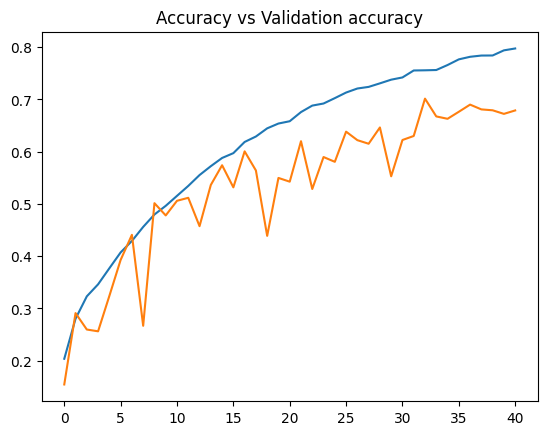

In [20]:
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Accuracy vs Validation accuracy')

Text(0.5, 1.0, 'Loss vs Validation loss')

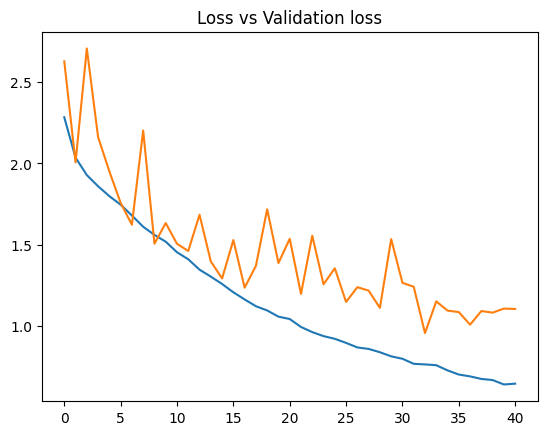

In [21]:
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Loss vs Validation loss')

In [ ]:
CNN_Batchnorm_Aug_v2.save('fastfood_cnn_batchn_aug_v2.h5')

In [ ]:
X_test, Y_test = get_images_to_predict(test_path, categories)

In [ ]:
preds = CNN_Batchnorm_Aug_v2.predict(X_test)

In [ ]:
predictions = probabilities_to_labels(preds)

In [ ]:
cm = confusion_matrix(Y_test, predictions)

In [ ]:
sns.heatmap(cm, cmap='Blues', xticklabels = categories, yticklabels = categories, annot = True, cbar = False, fmt=".1f")

In [ ]:
accuracy_score(Y_test, predictions)

In [13]:
train_datagen_aug_norm = ImageDataGenerator(rescale = 1./255,
                                       rotation_range = 30,
                                       width_shift_range = 0.1,
                                       height_shift_range = 0.1,
                                       fill_mode = 'nearest',
                                       zoom_range = 0.1,
                                       horizontal_flip = True,
                                       vertical_flip = True)

train_generator_aug_norm = train_datagen_aug_norm.flow_from_dataframe(train_df,
                                                    x_col = 'path',
                                                    y_col = 'label',
                                                    target_size=(256,256),
                                                    color_mode = 'rgb',
                                                    classes = categories,
                                                    batch_size = 32, 
                                                    class_mode='categorical')

Found 14778 validated image filenames belonging to 10 classes.


In [14]:
CNN_Batchnorm_Aug_v3 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 32, kernel_size = (11,11), activation = 'relu', input_shape = (256, 256, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2,2)),
    
    tf.keras.layers.Conv2D(filters = 96, kernel_size = (5,5), activation = 'relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2,2)),
    
    tf.keras.layers.Conv2D(filters = 96, kernel_size = (5,5), activation = 'relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2,2)),
    
    tf.keras.layers.Conv2D(filters = 256, kernel_size = (3,3), activation = 'relu'),
    tf.keras.layers.Conv2D(filters = 256, kernel_size = (3,3), activation = 'relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2,2)),
    
    tf.keras.layers.Conv2D(filters = 256, kernel_size = (3,3), activation = 'relu'),
    tf.keras.layers.Conv2D(filters = 256, kernel_size = (3,3), activation = 'relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2,2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units = 1024, activation = 'relu'),
    tf.keras.layers.Dense(units = 256, activation = 'relu'),
    tf.keras.layers.Dense(units = 10, activation = 'softmax')
])

In [15]:
CNN_Batchnorm_Aug_v3.compile(loss = 'CategoricalCrossentropy', optimizer = tf.keras.optimizers.Adam(), metrics = 'accuracy')

In [17]:
history = CNN_Batchnorm_Aug_v3.fit(train_generator_aug_norm, validation_data = validation_generator_norm, epochs = 100, callbacks = [es])

Epoch 1/100
462/462 [==============================] - 325s 679ms/step - loss: 2.2538 - accuracy: 0.2015 - val_loss: 2.1131 - val_accuracy: 0.2237
Epoch 2/100
462/462 [==============================] - 239s 517ms/step - loss: 2.0483 - accuracy: 0.2630 - val_loss: 2.0806 - val_accuracy: 0.2543
Epoch 3/100
462/462 [==============================] - 239s 517ms/step - loss: 1.9510 - accuracy: 0.3128 - val_loss: 2.2662 - val_accuracy: 0.2091
Epoch 4/100
462/462 [==============================] - 228s 493ms/step - loss: 1.8879 - accuracy: 0.3388 - val_loss: 2.4556 - val_accuracy: 0.2606
Epoch 5/100
462/462 [==============================] - 226s 489ms/step - loss: 1.8247 - accuracy: 0.3703 - val_loss: 2.1191 - val_accuracy: 0.2509
Epoch 6/100
462/462 [==============================] - 226s 489ms/step - loss: 1.7686 - accuracy: 0.3871 - val_loss: 1.7630 - val_accuracy: 0.3851
Epoch 7/100
462/462 [==============================] - 219s 475ms/step - loss: 1.7149 - accuracy: 0.4121 - val_loss: 1

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

In [ ]:
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Accuracy vs Validation accuracy')

In [ ]:
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Loss vs Validation loss')

In [ ]:
CNN_Batchnorm_Aug_v3.save('fastfood_cnn_batchn_aug_v3.h5')

In [ ]:
X_test, Y_test = get_images_to_predict(test_path, categories, rescale = True)

In [ ]:
preds = CNN_Batchnorm_Aug_v3.predict(X_test)

In [ ]:
predictions = probabilities_to_labels(preds)

In [ ]:
cm = confusion_matrix(Y_test, predictions)

In [ ]:
sns.heatmap(cm, cmap='Blues', xticklabels = categories, yticklabels = categories, annot = True, cbar = False, fmt=".1f")

In [ ]:
accuracy_score(Y_test, predictions)